啦啦啦，终于可以开始比赛啦，刚在Ubuntu试了一下发现不太好用，又转战回Windows了，让我们开始赛题A：医药电商销售数据分析

In [23]:
#导入可能需要的库
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torchvision
import re

In [24]:
data = pd.read_excel("D:/2022年全国大学生数据分析大赛/2022年全国大学生数据分析大赛赛题/2022年全国大学生数据分析大赛赛题/题目A：医药电商销售数据分析/data/data.xlsx") #用read_excel格式读取文件,用csv格式读取文件会报错
data.shape #查看数据形状,得到共有75110条数据，每个数据有10条信息

(75110, 10)

In [25]:
data.head() #观察前五行进行分析

,date_time,id,shop_name,title,sku_name,price,sold,discount,brand,parameter
0,2020-11-01,3985971101463,宜度海外专营店,特价处理！超低价19.9元起！含维生素ABCDE B族B12 维生素锌硒片,维生素e 300粒--买3送1,60.900000,19,9折,NaN,厂名:Puritan's Pride||品牌:Puritan‘s Pride/普丽普莱||生...
1,2020-11-01,4224064440294,天猫国际进口超市,FANCL男40岁综合营养包30包/袋*2复合多种维生素日本芳珂fancl,(【直营】日本FANCL/芳珂 40岁男性综合维生素营养 30袋（30天量）)*2,500.000000,71,9折,NaN,品牌:FANCL||系列:综合营养包||生产企业:FANCL株式会社
2,2021-12-01,3437759489038,阿里健康大药房,民生21金维他多维元素片30片儿童男女成人补充维生素矿物质缺乏,国民大牌| 补充21种维矿,22.416667,366,9.5折,NaN,产品名称:21金维他 多维元素片（21） 30片*1瓶/盒||药品通用名:多维元素片（21）...
3,2021-12-01,576002931540,天猫国际进口超市,【直营】美国进口安利简装倍立健多种复合维生素矿物质营养186片,NaN,452.250000,28,9.5折,NaN,厂名:Amway Dominican Republic LLC||生产企业:Amway||系...
4,2021-03-01,4363644898037,阿里健康大药房,买2送礼】elevit/爱乐维复合维生素片140粒维生素缺乏症贫血官方,爱乐维玛咖锌淫羊藿胶囊140粒+爱乐维 复合维生素片30片/盒,371.666667,32,9折,NaN,品牌:elevit/爱乐维||药品名称:复合维生素片||药品通用名:复合维生素片||生产企业...


In [26]:
#利用deactibe函数对数据进行分析

#对数值型数据的分析
data.describe()
#id的统计为无关数据，我们得到price和sold数据的数值分析

,id,price,sold
count,7.511000e+04,75110.000000,75110.000000
mean,2.052641e+12,132.123663,240.972427
std,1.780464e+12,117.285795,1384.204069
min,2.796074e+09,1.010000,0.000000
25%,5.574710e+11,57.000000,2.000000
50%,6.035649e+11,107.000000,11.000000
75%,4.012427e+12,169.000000,70.000000
max,4.717618e+12,4266.250000,103940.000000


In [27]:
#对object型数据的分析
data.describe(include='object')
#观察可得，一共包含26家店铺

,shop_name,title,sku_name,discount,brand,parameter
count,75110,75110,33285,72226,23944,72558
unique,26,11258,4733,3,465,5104
top,阿里健康大药房,养生堂成长快乐儿童多种复合维生素和乳钙蓝莓VC Q片软片糖果组合,标准装,9.5折,BY－HEALTH/汤臣倍健,品牌:swisse
freq,16958,249,2186,32338,3681,359


In [28]:
#接下来对店铺进行销售额的分析

#1 首先计算每个药品的销售总额
print(data['discount'].describe()) #由此可得有72226份数据不为空值，剩下数据均为原价出售因此显示为空，我们对其进行填充
data['discount'] = data['discount'].fillna("10折") #对空值数据以10折(即原价进行填充)
data['discount'] = data['discount'].apply(lambda x: float(re.search(r'\d+\.?\d*', x).group())) #利用正则表达式提取字符串中的数据
print(data['discount'])

data['profit'] = data['price'] * data['sold'] * data['discount'] * 0.1 #得到每份药品的利润值
print(data['profit'])

count     72226
unique        3
top        9.5折
freq      32338
Name: discount, dtype: object
0        9.0
1        9.0
2        9.5
3        9.5
4        9.0
        ... 
75105    9.0
75106    9.0
75107    9.0
75108    9.0
75109    9.0
Name: discount, Length: 75110, dtype: float64
0          1041.390
1         31950.000
2          7794.275
3         12029.850
4         10704.000
            ...    
75105    182044.800
75106     34938.000
75107      7416.900
75108      7871.850
75109     19806.840
Name: profit, Length: 75110, dtype: float64


There are 26 stores
宜度海外专营店: 0.40%
天猫国际进口超市: 23.73%
阿里健康大药房: 44.99%
天猫国际妙颜社: 2.38%
天猫超市: 7.65%
百康保健品专营店: 0.35%
ChemistWarehouse海外旗舰店: 3.69%
阿里健康大药房海外店: 7.10%
康恩贝官方旗舰店: 6.37%
百秀大药房旗舰店: 0.19%
nyc美林健康海外专营店: 0.29%
康爱多大药房旗舰店: 0.33%
NRC营养优选海外专营店: 0.09%
skyshop海外专营店: 0.43%
苏宁易购官方旗舰店: 0.71%
hihealth海外专营店: 0.23%
nrfs湖畔海外专营店: 0.06%
康寿营养品店: 0.04%
焦作国控大药房旗舰店: 0.10%
thejamy保健海外专营店: 0.65%
美加精品: 0.04%
搬运健康馆: 0.05%
LuckyVitamin海外旗舰店: 0.02%
同堂保健品专营店: 0.00%
进口/国产保健品精品店: 0.05%
SASA美国直邮: 0.02%


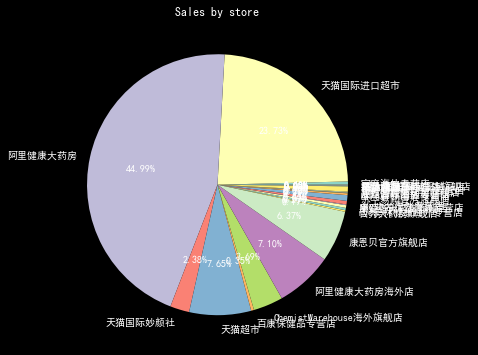

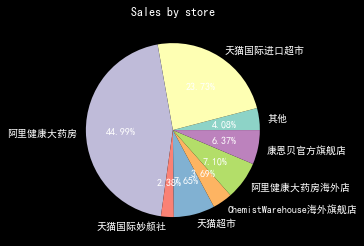

In [29]:
from collections import defaultdict

#统计每家商铺的总销售额
sales_by_store = defaultdict(float)

for i in range(len(data)):
    sales_by_store[data['shop_name'][i]] += data['profit'][i]

print(f"There are {len(sales_by_store)} stores")
# 计算总销售额
total_sales = sum(sales_by_store.values())

##按销售额对店铺进行排序
#sales_by_store = sorted(sales_by_store.items(), key=lambda x:x[1],reverse=True) #排序之后字典变成列表型数据，又要转换数据类型好麻烦，索性不排序，在下面使用饼状图清晰展现销售额占比

# 输出各家商铺的销售额占比
for store, sales in sales_by_store.items():
    print(f'{store}: {sales / total_sales:.2%}')

# 准备数据
stores = list(sales_by_store.keys())
sales = list(sales_by_store.values())
# 绘制饼图
#plt.figure(facecolor='white') #设置为白色背景，但是白色背景会遮掩字体，选择删除
# 设置中文字体,解决一开始中文字符无法显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8, 6))
plt.pie(sales, labels=stores, autopct=lambda p: f'{p:.2f}%') #autopct在扇形中添加百分比标签可以是字符串格式化代码或函数。
#plt.legend(loc='upper right') #使用matplotlib的legend()函数将标签文字放在图像的旁边，但是实际效果并不是太好
plt.title('Sales by store')
plt.show()

#得到的饼状图过于拥挤难以看清，考虑将销售额占比小于1的店铺合为一个并标签为"其他"
# 计算百分比
percentages = [x_i / sum(sales) * 100 for x_i in sales]
# 将小于1%的扇形合并成“其他”扇形
x_new = [0] #将其他标签放在第一位方便进行统计
labels_new = ['其他']
for percentage, label in zip(percentages, stores):
    if percentage < 1:
        x_new[0] += percentage
    else:
        x_new.append(percentage)
        labels_new.append(label)
#print(x_new,labels_new)
# 绘制饼图
plt.pie(x_new, labels=labels_new,autopct=lambda p: f'{p:.2f}%')
plt.title('Sales by store')
plt.show()

如上图，我们可以很容易地得到每家店铺销售额的占比，并得出销售额占比最高的店铺时阿里健康大药房，占比44.99%
下面我们分析阿里健康大药房的销售情况(啥叫销售情况鸭emm，这里怎么分析，我试试(试试就逝世~))

In [30]:
#让我们来分析时间(也就是第一列的date_time)对销售额的影响   (ps:这里给的date_time时xx年x月1日，应该指的是这一整个月的销售情况而不是1号这一天吧，感觉这里题目不太严谨哦~)
#首先让我们单独提取出年月日
from datetime import datetime

years = []
months = []
days = []
# 定义 lambda 函数
convert_timestamp = lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") #利用striptime函数提取，这里强制转换timestamp数据为str类型，不然函数会报错
for i in range(len(data)):
    date = convert_timestamp(data['date_time'][i]) #感觉这里还可以进一步优化，但我有点写不出来了，害
    years.append(date.year)
    months.append(date.month)
    days.append(date.day)
   
data['year'] = years
data['month'] = months
data['day'] = days

#我们发现所有day都是1号，这没有实际作用因此选择删除，并且我们有了年和月之后也可以选择删除之前的date_time数据
data = data.drop(columns=['date_time','day'])
print(data.shape) #现在我们的数据只有12列啦

(75110, 12)


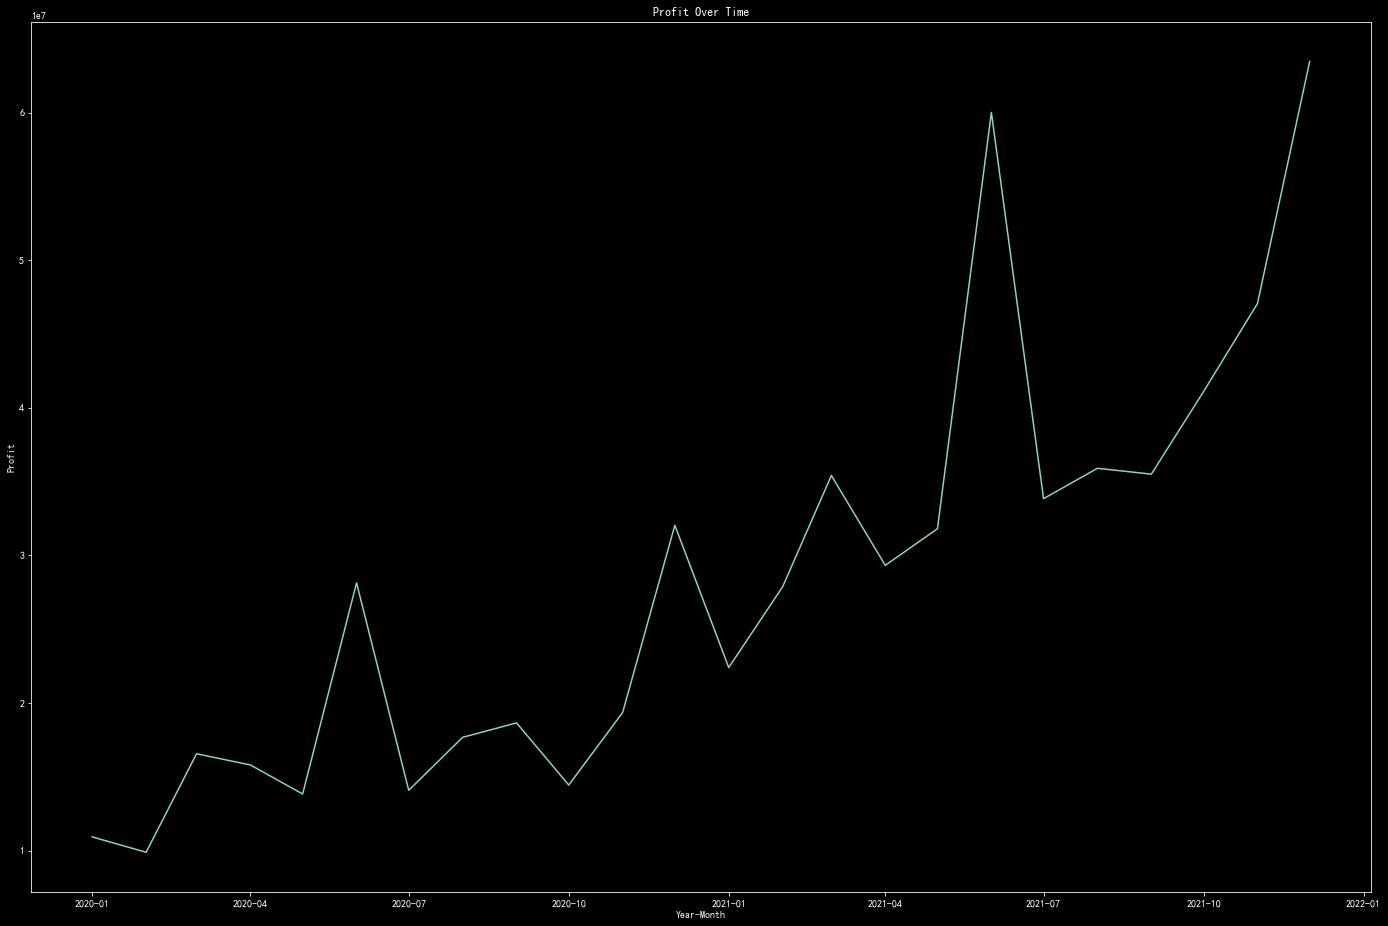

In [31]:
#分析阿里健康大药房的销售额随时间的变化
from datetime import datetime

profits = {}
for i in range(len(data)):
    if data['shop_name'][i] == '阿里健康大药房':
        profit = data['profit'][i]
        year_month = f"{data['year'][i]}-{data['month'][i]}"
        '''
        if year_month in profits:
            profits[year_month] += profit
        else:
            profits[year_month] = profit
            '''
         # 将年月字符串转换为日期类型
        date = datetime.strptime(year_month, '%Y-%m')
        # 累加到对应的年月
        if date in profits:
            profits[date] += profit
        else:
            profits[date] = profit
            

# 绘制折线图
sorted_profits = dict(sorted(profits.items(),key=lambda item:item[0]))
plt.figure(figsize=(24, 16))
plt.plot(list(sorted_profits.keys()), list(sorted_profits.values()))
plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.title('Profit Over Time')
plt.show()

一共有 9697 个药品
药品 3985971101463 的销售额占比为 0.00037%。
药品 4224064440294 的销售额占比为 0.03732%。
药品 3437759489038 的销售额占比为 0.01757%。
药品 576002931540 的销售额占比为 0.00501%。
药品 4363644898037 的销售额占比为 0.00312%。
药品 572151739068 的销售额占比为 0.07880%。
药品 587160787155 的销售额占比为 0.42458%。
药品 4433188598832 的销售额占比为 0.01559%。
药品 589309183337 的销售额占比为 0.07934%。
药品 3452991932319 的销售额占比为 0.82560%。
药品 4498163570749 的销售额占比为 0.01000%。
药品 4409264361728 的销售额占比为 0.00134%。
药品 544177973672 的销售额占比为 0.00361%。
药品 601027894800 的销售额占比为 0.13408%。
药品 4445729007156 的销售额占比为 0.22553%。
药品 4307132621923 的销售额占比为 0.10949%。
药品 3960352460289 的销售额占比为 0.07878%。
药品 530924750166 的销售额占比为 0.01462%。
药品 3472975189945 的销售额占比为 0.05984%。
药品 4217753934438 的销售额占比为 0.02683%。
药品 3460960387237 的销售额占比为 0.01109%。
药品 4489397438669 的销售额占比为 0.00366%。
药品 4500307758492 的销售额占比为 0.00734%。
药品 3733029515023 的销售额占比为 0.01550%。
药品 4341569579243 的销售额占比为 0.01548%。
药品 4307964604727 的销售额占比为 0.02093%。
药品 4575268750022 的销售额占比为 0.00307%。
药品 602536621060 的销售额占比为 0.29091%。
药品 534849634885

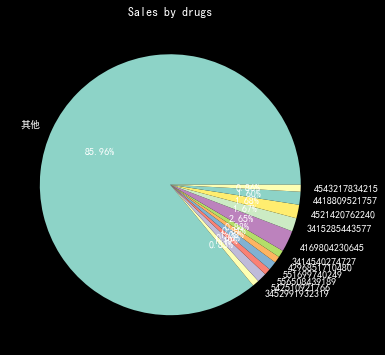

In [32]:
#接下来对药品进行分析

#首先分析药品总数和销售额占比
sales_by_drugs = {}
for i in range(len(data)):
    id = data['id'][i]
    profit = data['profit'][i]
    if id in sales_by_drugs:
        sales_by_drugs[id] += profit
    else:
        sales_by_drugs[id] = profit

# 计算药品的总销售额
total_sales = sum(sales_by_drugs.values())

# 输出结果
print(f"一共有 {len(sales_by_drugs)} 个药品") #得到一共有9697种药品，由于药品实在太多无法做饼状图，因此将销售额靠前的药品的饼状图做出，其余药品标记为其他
for drug_id, amount in sales_by_drugs.items():
    print(f"药品 {drug_id} 的销售额占比为 {amount / total_sales * 100:.5f}%。") #输出各药品的销售额占比

# 准备数据
drugs = list(sales_by_drugs.keys())
sales = list(sales_by_drugs.values())
# 绘制饼图
#plt.figure(facecolor='white') #设置为白色背景，但是白色背景会遮掩字体，选择删除
# 设置中文字体,解决一开始中文字符无法显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8, 6))
#得到的饼状图过于拥挤难以看清，考虑将销售额占比小于0.8的药品合为一个并标签为"其他",可以得到排名前11的药品销售额占比
# 计算百分比
percentages = [x_i / sum(sales) * 100 for x_i in sales]
x_new = [0] #将其他标签放在第一位方便进行统计
labels_new = ['其他']
for percentage, label in zip(percentages, drugs):
    if percentage < 0.8:
        x_new[0] += percentage
    else:
        x_new.append(percentage)
        labels_new.append(label)
#print(x_new,labels_new)
# 绘制饼图
plt.pie(x_new, labels=labels_new,autopct=lambda p: f'{p:.2f}%')
plt.title('Sales by drugs')
plt.show()


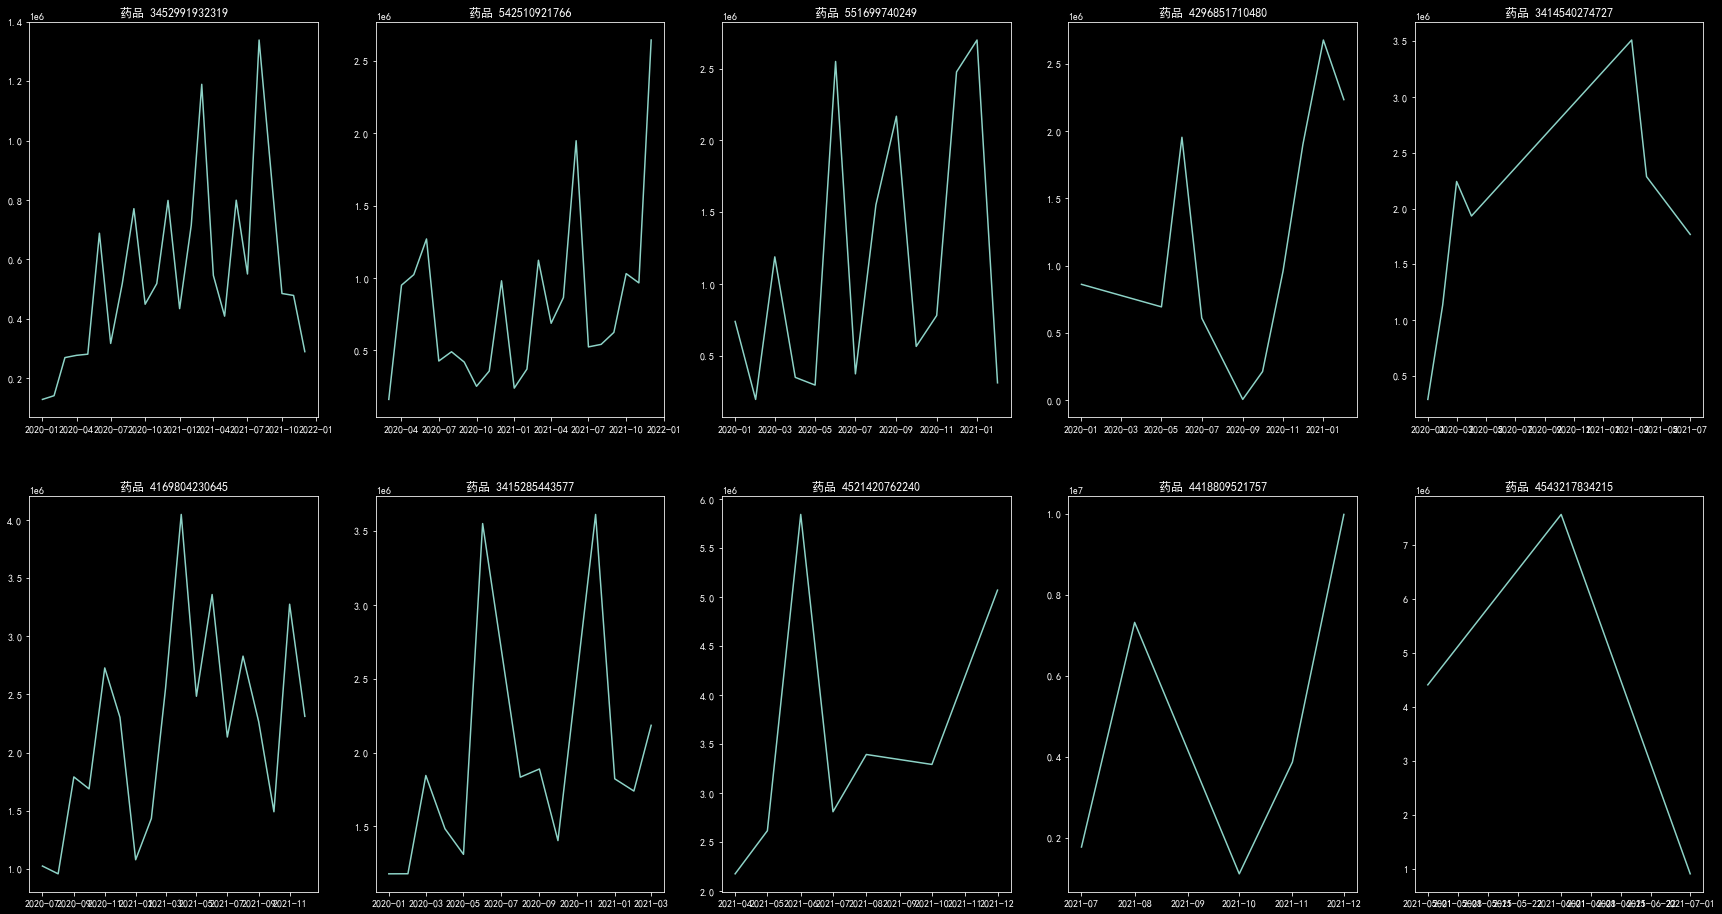

In [33]:
#找到销售额最高的10种药品
'''
# 按照药品ID分组，计算每个药品的销售额总和
sales_sum = data.groupby("id")["profit"].sum().sort_values(ascending=False)

# 取前10行，得到销售额占比最高的10个药品
top_10_ids = sales_sum.index[:10]

# 循环遍历每个药品
for id in top_10_ids:
    # 读取当前药品的销售数据
    sales_data = data[data["id"] == id]
    
    # 按照年份和月份分组，计算每年每月的销售额总和
    sales_by_year_month = sales_data.groupby(["year", "month"])["profit"].sum()
    
    # 绘制折线图
    #plt.plot(sales_by_year_month.index, sales_by_year_month.values)
    print(id,sales_by_year_month)

# 显示图形
#plt.show()
'''
# 对各个药品的销售额进行排序
sorted_sales = sorted(sales_by_drugs.items(), key=lambda x: x[1], reverse=True)

# 取出前 10 个药品
top_10_drugs = sorted_sales[:10]
#for drug in top_10_drugs:
    #print(f'药品 ID: {drug[0]}, 销售额: {drug[1]}')

# 取出前 10 个药品
top_10_drugs = {drug[0] for drug in sorted_sales[:10]}
# 对每一种药品的销售额按照年月进行分组
sales_by_month = {}

for i in range(len(data)):
    id = data['id'][i]
    profit = data['profit'][i]
    year = data['year'][i]
    month = data['month'][i]
    # 如果该药品在前 10 名，则加入 sales_by_month 字典
    if id in top_10_drugs:
        if id in sales_by_month:
        # 如果该药品已经在字典中，则加入月份数
            sales_by_month[id].append((year, month, profit))
        else:
        # 否则，将该药品加入字典
            sales_by_month[id] = [(year, month, profit)]
'''   
#创建一个 Figure 对象
figure = plt.figure(figsize=(12, 8))
#循环绘制每一种药品的曲线图
for drug_id, sale_by_month in sales_by_month.items():
# 取出销售额和月份数据
    sales = [x[2] for x in sale_by_month]
    months = [f'{x[0]}-{x[1]}' for x in sale_by_month]
    # 在 Figure 对象上绘制折线图
    
    plt.plot(months, sales)
#设置图表标题
plt.title('药品每月销售额')
#设置 X 轴标题
plt.xlabel('月份')
#设置 Y 轴标题
plt.ylabel('销售额')
#显示图表
plt.show()
'''
# 创建一个 Figure 对象
figure = plt.figure(figsize=(30, 16))

# 循环绘制每一种药品的曲线图
for i, (drug_id, sale_by_month) in enumerate(sales_by_month.items()):
    # 设置子图
    plt.subplot(2, 5, i + 1)
    # 取出销售额和月份数据
    sales = [x[2] for x in sale_by_month]
    months = [f'{x[0]}-{x[1]}' for x in sale_by_month]
    profits = {}
    for j in range(len(sales)):
        profit = sales[j]
        year_month = months[j]
         # 将年月字符串转换为日期类型
        date = datetime.strptime(year_month, '%Y-%m')
        # 累加到对应的年月
        if date in profits:
            profits[date] += profit
        else:
            profits[date] = profit
    sorted_profits = dict(sorted(profits.items(),key=lambda item:item[0]))
    plt.plot(list(sorted_profits.keys()), list(sorted_profits.values()))
    #sorted_profits = dict(sorted(sorted.item(),key=lambda item:item[0]))
    #print(sorted_profits)
    # 在 Figure 对象上绘制折线图
    #plt.plot(list(sorted_profits.keys()),list(sorted_profits.values()))
    # 设置子图标题
    plt.title(f'药品 {drug_id}')

# 显示图表
plt.show()

In [34]:
#接下来对药品品牌进行分析
'''
#这段代码分析有问题，很多药品的品牌藏在paramter参数里，但是paramter里面又有多个品牌参数，很麻烦，害
#首先分析药品品牌和销售额占比 
sales_by_bands = {}
for i in range(len(data)):
    id = data['brand'][i]
    profit = data['profit'][i]
    if id in sales_by_bands:
        sales_by_bands[id] += profit
    else:
        sales_by_bands[id] = profit

# 计算药品的总销售额
total_sales = sum(sales_by_bands.values()) 

# 输出结果
print(f"一共有 {len(sales_by_bands)} 个药品品牌") #得到一共有456种药品品牌
for drug_id, amount in sales_by_bands.items():
    print(f"药品 {drug_id} 的销售额占比为 {amount / total_sales * 100:.5f}%。") #输出各药品品牌的销售额占比
'''

'\n#这段代码分析有问题，很多药品的品牌藏在paramter参数里，但是paramter里面又有多个品牌参数，很麻烦，害\n#首先分析药品品牌和销售额占比 \nsales_by_bands = {}\nfor i in range(len(data)):\n    id = data[\'brand\'][i]\n    profit = data[\'profit\'][i]\n    if id in sales_by_bands:\n        sales_by_bands[id] += profit\n    else:\n        sales_by_bands[id] = profit\n\n# 计算药品的总销售额\ntotal_sales = sum(sales_by_bands.values()) \n\n# 输出结果\nprint(f"一共有 {len(sales_by_bands)} 个药品品牌") #得到一共有456种药品品牌\nfor drug_id, amount in sales_by_bands.items():\n    print(f"药品 {drug_id} 的销售额占比为 {amount / total_sales * 100:.5f}%。") #输出各药品品牌的销售额占比\n'

In [35]:
import difflib
#对药品品牌进行分析
#注意，我们发现有的药品paramter参数中含有两个品牌，我们需要根据商品标题title对其进行进一步筛选
#提取paramter参数中的有用信息
total_param = {} #统计出现过的品牌参数
for i in range(len(data)):
    flag = 0
    paramter = str(data['parameter'][i]).split('||') #字符串分割成一个个参数
    param_dict = {}
    brands = []
    for param in paramter:
        if len(param.split(":")) == 1: #如果param参数为nan则跳过
            continue
        key, value = param.split(':')
        param_dict[key] = value
        if key not in total_param:
            total_param[key] = 1 #由于每个药品的param参数不同，因此统计不同的药品参数的总数量
        else :
            total_param[key] += 1
        if key == '品牌':
            flag += 1
            brands.append(value)
    if flag == 1:
        data['brand'][i] = brands[0]
    elif flag >= 2:
        standard_string = data['title'][i]
        # 计算检测字符串和标准字符串之间的相似度
        similarities = [(test_string, difflib.SequenceMatcher(None, standard_string, test_string).ratio()) for test_string in brands] #这里我们考虑在药品的paramter参数出现多个品牌时，将与title最相似的品牌名作为该药品的品牌
        data['brand'][i] = max(similarities, key=lambda x: x[1])[0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8744\1805062939.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'][i] = brands[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8744\1805062939.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'][i] = max(similarities, key=lambda x: x[1])[0]


In [36]:
data['brand'].describe(include='object')

count              73457
unique               542
top       BY－HEALTH/汤臣倍健
freq                5323
Name: brand, dtype: object

一共有 543 个药品品牌
药品品牌 Puritan‘s Pride/普丽普莱 的销售额占比为 0.61710%。
药品品牌 FANCL 的销售额占比为 3.10818%。
药品品牌 21金维他 的销售额占比为 2.13720%。
药品品牌 AMWAY/安利 的销售额占比为 0.44666%。
药品品牌 elevit/爱乐维 的销售额占比为 6.72192%。
药品品牌 swisse 的销售额占比为 19.15902%。
药品品牌 CENTRUM/善存 的销售额占比为 7.52674%。
药品品牌 BY－HEALTH/汤臣倍健 的销售额占比为 2.71971%。
药品品牌 朗迪 的销售额占比为 2.18720%。
药品品牌 曼多能 的销售额占比为 0.01000%。
药品品牌 成长快乐 的销售额占比为 0.37461%。
药品品牌 CONBA/康恩贝 的销售额占比为 8.19623%。
药品品牌 Doppel Herz/双心 的销售额占比为 0.26625%。
药品品牌 优卡丹 的销售额占比为 0.31345%。
药品品牌 仁和 的销售额占比为 0.14437%。
药品品牌 双鲸 的销售额占比为 0.39300%。
药品品牌 星鲨 的销售额占比为 6.72635%。
药品品牌 养生堂 的销售额占比为 4.01079%。
药品品牌 华东 的销售额占比为 0.02510%。
药品品牌 恒健 的销售额占比为 1.41661%。
药品品牌 Jamieson/健美生 的销售额占比为 1.57024%。
药品品牌 Ostelin/奥斯特林 的销售额占比为 0.49553%。
药品品牌 Megafood 的销售额占比为 0.05388%。
药品品牌 贝特令 的销售额占比为 0.19922%。
药品品牌 Nature Made/天维美 的销售额占比为 0.13641%。
药品品牌 丽点 的销售额占比为 1.37383%。
药品品牌 One a day 的销售额占比为 0.10518%。
药品品牌 伊可新 的销售额占比为 3.99313%。
药品品牌 益体健 的销售额占比为 0.00044%。
药品品牌 OPPULAND 的销售额占比为 0.02098%。
药品品牌 CALTRATE/钙尔奇 的销售额占比为 1.54852%。
药品品牌 KEYLID/健力多 的销售额占比为 0.27

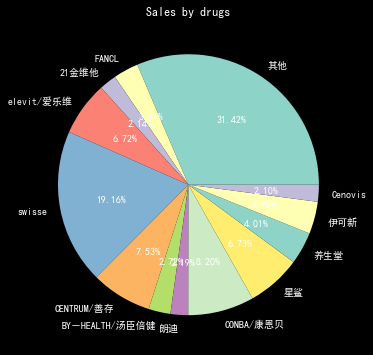

In [37]:
#处理好药品的品牌后，除了少部分brand和paramter均缺失的药品，其余药品的品牌均得到补充，对于brand和paramter均缺失的药品，其title和sku_name告知了关于品牌的部分信息，但无法根据此推断其品牌名，因此就当作nan处理
#接下来对药品品牌进行分析
#首先分析药品品牌和销售额占比 
sales_by_bands = {}
for i in range(len(data)):
    band = data['brand'][i]
    profit = data['profit'][i]
    if band in sales_by_bands:
        sales_by_bands[band] += profit
    else:
        sales_by_bands[band] = profit

# 计算药品的总销售额
total_sales = sum(sales_by_bands.values()) 

# 输出结果
print(f"一共有 {len(sales_by_bands)} 个药品品牌") #得到一共有456种药品品牌
for drug_id, amount in sales_by_bands.items():
    print(f"药品品牌 {drug_id} 的销售额占比为 {amount / total_sales * 100:.5f}%。") #输出各药品品牌的销售额占比

# 准备数据
drugs = list(sales_by_bands.keys())
sales = list(sales_by_bands.values())
# 绘制饼图
#plt.figure(facecolor='white') #设置为白色背景，但是白色背景会遮掩字体，选择删除
# 设置中文字体,解决一开始中文字符无法显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(8, 6))
#得到的饼状图过于拥挤难以看清，考虑将销售额占比小于2的药品品牌合为一个并标签为"其他",可以得到排名靠前的药品销售额占比
# 计算百分比
percentages = [x_i / sum(sales) * 100 for x_i in sales]
x_new = [0] #将其他标签放在第一位方便进行统计
labels_new = ['其他']
for percentage, label in zip(percentages, drugs):
    if percentage < 2:
        x_new[0] += percentage
    else:
        x_new.append(percentage)
        labels_new.append(label)
#print(x_new,labels_new)
# 绘制饼图
plt.pie(x_new, labels=labels_new,autopct=lambda p: f'{p:.2f}%')
plt.title('Sales by drugs')
plt.show()

In [38]:
#统计销售额最高的10个药品品牌
# 对各个药品的销售额进行排序
sorted_sales = sorted(sales_by_bands.items(), key=lambda x: x[1], reverse=True)

# 取出前 10 个药品品牌
top_10_drugs = sorted_sales[:10]
for drug in top_10_drugs:
    print(f'药品 brand: {drug[0]}, 销售额: {drug[1]}')

药品 brand: swisse, 销售额: 287465294.5815825
药品 brand: CONBA/康恩贝, 销售额: 122977735.2621484
药品 brand: CENTRUM/善存, 销售额: 112932460.24114303
药品 brand: 星鲨, 销售额: 100923313.11292477
药品 brand: elevit/爱乐维, 销售额: 100856922.81153868
药品 brand: 养生堂, 销售额: 60178662.52796357
药品 brand: 伊可新, 销售额: 59913552.02115786
药品 brand: FANCL, 销售额: 46635618.7234228
药品 brand: BY－HEALTH/汤臣倍健, 销售额: 40806975.43529344
药品 brand: 朗迪, 销售额: 32817074.801255737


In [39]:
#分析这10个品牌销售较好的原因
#这10个品牌的大多数商品均提供了不错的优惠制度，且这10个品牌本身就是大品牌，拥有自身的用户群体和市场，同时商品的标题起到了很好的宣传作用，
#并且药品售卖商铺大多都是拥有良好用户市场的电子商务网站，因此能取得较好的销售额

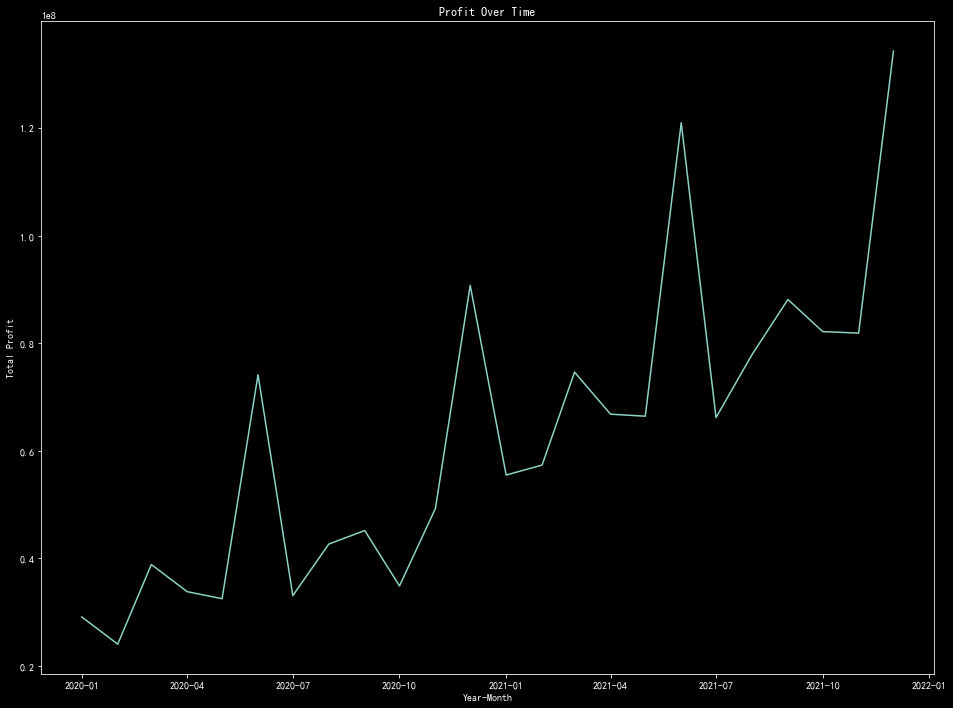

year  month
2020  1        2.907732e+07
      2        2.402555e+07
      3        3.883273e+07
      4        3.378211e+07
      5        3.248638e+07
      6        7.414630e+07
      7        3.305252e+07
      8        4.263468e+07
      9        4.516212e+07
      10       3.485498e+07
      11       4.926924e+07
      12       9.077518e+07
2021  1        5.548417e+07
      2        5.734087e+07
      3        7.462681e+07
      4        6.681211e+07
      5        6.643281e+07
      6        1.210244e+08
      7        6.617255e+07
      8        7.787211e+07
      9        8.814363e+07
      10       8.217563e+07
      11       8.188439e+07
      12       1.343489e+08
Name: profit, dtype: float64

In [40]:
'''
grouped = data.groupby(['year','month'])
sale_sum = grouped['profit'].sum()
sale_sum
plt.plot(sale_sum) #本来想用groupby函数写的，但是这里一直会报错，搞了很久最后gitve up了
plt.show()
'''
#分析销售总额的变化情况
profits = {}
for i in range(len(data)):
    profit = data['profit'][i]
    year_month = f"{data['year'][i]}-{data['month'][i]}"
     # 将年月字符串转换为日期类型
    date = datetime.strptime(year_month, '%Y-%m')
    # 累加到对应的年月
    if date in profits:
        profits[date] += profit
    else:
        profits[date] = profit

# 绘制折线图
plt.figure(figsize=(16,12))
sorted_profits = dict(sorted(profits.items(),key=lambda item:item[0]))
plt.plot(list(sorted_profits.keys()), list(sorted_profits.values()))
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.title('Profit Over Time')
plt.show()
grouped = data.groupby(['year','month'])
sale_sum = grouped['profit'].sum()
sale_sum

2020-01-01    2.907732e+07
2020-02-01    2.402555e+07
2020-03-01    3.883273e+07
2020-04-01    3.378211e+07
2020-05-01    3.248638e+07
2020-06-01    7.414630e+07
2020-07-01    3.305252e+07
2020-08-01    4.263468e+07
2020-09-01    4.516212e+07
2020-10-01    3.485498e+07
2020-11-01    4.926924e+07
2020-12-01    9.077518e+07
2021-01-01    5.548417e+07
2021-02-01    5.734087e+07
2021-03-01    7.462681e+07
2021-04-01    6.681211e+07
2021-05-01    6.643281e+07
2021-06-01    1.210244e+08
2021-07-01    6.617255e+07
2021-08-01    7.787211e+07
2021-09-01    8.814363e+07
2021-10-01    8.217563e+07
2021-11-01    8.188439e+07
2021-12-01    1.343489e+08
dtype: float64


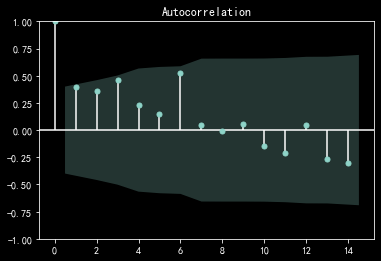

'\n#由前面一个单元格的绘图可以看出销售额的变动和季节存在一定关系，这里采用ARIMA模型来进行时间序列检测\n# 建立 ARIMA 模型\nmodel = sm.tsa.ARIMA(sales_ts, order=(1, 1, 1))\n\n# 训练模型\nmodel_fit = model.fit()\n\n# 预测未来12个月的销售总额\nforecast, stderr, conf_int = model_fit.forecast(12)\n\n# 打印预测结果\nprint(forecast) #这里内核又直接死掉了emm，得换一种分析方法或者处理数据\n'

In [41]:
#这里要求我们预测天猫维生素类药品未来三个月的销售总额，我们虽然知道每一份药品的相关信息，但是对整体销售额进行分析时，似乎很难由单个药品的某些信息得到总销售额的相关关系，如果对每份药品单独预测销售额再累加显然不符合实际
#因此我们在这里利用时间序列进行分析
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# 将数据转换为时间序列格式
sales_ts = pd.Series(sorted_profits)

# 查看数据
print(sales_ts)

#利用pandas库中的时间序列分析功能来预测未来的药品销售总额
#分析数据的趋势和季节性,查看是否可使用ARIMA模型来进行时间序列检测
# 绘制自相关图
plot_acf(sales_ts)
plt.show()

# 绘制偏相关图
#plot_pacf(sales_ts,nlags=4) #这里由于数据量太少程序会报错，孤儿采用另一种检测方式：单位根检测
#plt.show()
#from statsmodels.tsa.stattools import adfuller
# 对数据进行单位根检验
#result = adfuller(sales_ts) #数据太少啦，内核直接G了，还是得换种方法
#print(result)
'''
#由前面一个单元格的绘图可以看出销售额的变动和季节存在一定关系，这里采用ARIMA模型来进行时间序列检测
# 建立 ARIMA 模型
model = sm.tsa.ARIMA(sales_ts, order=(1, 1, 1))

# 训练模型
model_fit = model.fit()

# 预测未来12个月的销售总额
forecast, stderr, conf_int = model_fit.forecast(12)

# 打印预测结果
print(forecast) #这里内核又直接死掉了emm，得换一种分析方法或者处理数据
'''

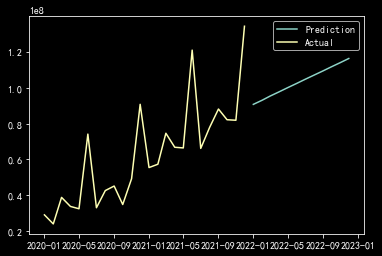

In [42]:
#由于数据量太少，考虑使用移动平均模型来实现未来销售额的预测
from sklearn.linear_model import LinearRegression
#对数据进行平滑处理
sales_ts_ma = sales_ts.rolling(window=3).mean()
# 检查数据中是否存在无效值
if any(pd.isnull(sales_ts_ma)):
    # 使用平均值替换无效值
    sales_ts_ma = sales_ts_ma.fillna(sales_ts_ma.mean())

#在移动平均值的基础上，使用最小二乘法拟合移动平均模型
X = np.arange(len(sales_ts_ma)).reshape(-1, 1)
y = sales_ts_ma.values
model = LinearRegression()
model.fit(X, y)

#使用移动平均模型来预测未来的数据值
# 预测未来的销售额
num_future_periods = 12  # 预测未来12个月
future_periods_index = pd.date_range(start='2022-01-01', periods=num_future_periods, freq='MS')
X_future = np.arange(len(sales_ts_ma)+num_future_periods).reshape(-1, 1)
future_predictions = model.predict(X_future)

# 将预测结果转换为时间序列格式
predictions_ts = pd.Series(future_predictions[-12:], index=future_periods_index)
# 绘制预测结果的折线图
plt.plot(predictions_ts, label='Prediction')
plt.plot(sales_ts, label='Actual')
plt.legend()
plt.show()

In [43]:
import datetime
#key = [datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 3, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0), datetime.datetime(2020, 5, 1, 0, 0), datetime.datetime(2020, 6, 1, 0, 0), datetime.datetime(2020, 7, 1, 0, 0), datetime.datetime(2020, 8, 1, 0, 0), datetime.datetime(2020, 9, 1, 0, 0), datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2020, 11, 1, 0, 0), datetime.datetime(2020, 12, 1, 0, 0), datetime.datetime(2021, 1, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 4, 1, 0, 0), datetime.datetime(2021, 5, 1, 0, 0), datetime.datetime(2021, 6, 1, 0, 0), datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 8, 1, 0, 0), datetime.datetime(2021, 9, 1, 0, 0), datetime.datetime(2021, 10, 1, 0, 0), datetime.datetime(2021, 11, 1, 0, 0), datetime.datetime(2021, 12, 1, 0, 0)]
#value = [29077324.660542283, 24025553.131499983, 38832726.783499956, 33782107.57249998, 32486377.64366675, 74146301.75300008, 33052515.355500072, 42634677.03949998, 45162116.98549996, 34854977.51550005, 49269244.88400001, 90775175.62499984, 55484168.77533326, 57340868.4173336, 74626810.81941676, 66812107.28099988, 66432813.90075035, 121024356.40801239, 66172551.954685345, 77872105.11344971, 88143632.01091582, 82175628.05913113, 81884394.92528616, 134348892.40589666]
#kk = list(zip(key,value))
#kk = {'date':[d[0] for d in kk],'sales':[d[1] for d in kk]}
kk = {'date':sorted_profits.keys(),'sales':sorted_profits.values()}
df = pd.DataFrame(kk).set_index('date')
from statsmodels.tsa.stattools import adfuller

# 进行单位根检验
result = adfuller(df['sales'])

# 输出结果
print('ADF Statistic:', result[0])
print('p-value:', result[1]) #p-value大于0.05，数据不稳定，使用差分运算使数据平稳
print('Critical Values:', result[4])

# 进行一次差分
df_diff = df.diff().dropna()

# 进行单位根检验
result = adfuller(df_diff['sales'])

# 输出结果
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

#差分后数据平稳，使用平稳自回归模型对数据进行拟合
from statsmodels.tsa.arima.model import ARIMA

# 建立 ARIMA 模型，选择 (p, d, q) 模型
model = ARIMA(df, order=(1, 1, 1))

# 进行拟合
result = model.fit()

# 输出模型结果
print(result.summary())

ADF Statistic: -0.25863572716810906
p-value: 0.931161873228626
Critical Values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
ADF Statistic: -9.289109924338517
p-value: 1.1930431295752118e-15
Critical Values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -421.864
Date:                Fri, 06 Jan 2023   AIC                            849.728
Time:                        09:57:41   BIC                            853.135
Sample:                    01-01-2020   HQIC                           850.585
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z  

d:\anaconda_file\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda_file\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda_file\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-01-01    9.525010e+07
2022-02-01    1.053320e+08
2022-03-01    1.027323e+08
Freq: MS, Name: predicted_mean, dtype: float64


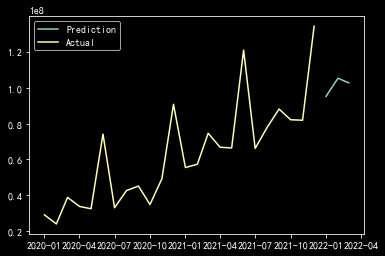

In [44]:
# 对未来 3 个月的销售额进行预测
pred = result.predict(start='2022-01-01', end='2022-03-01')

# 输出预测结果
print(pred)
plt.plot(pred, label='Prediction')
plt.plot(sales_ts, label='Actual')
plt.legend()
plt.show()